# python-igraph tutorial
https://igraph.org/python/doc/tutorial/tutorial.html

## conda install
https://anaconda.org/conda-forge/python-igraph

In [1]:
import igraph
print(igraph.__version__)

0.8.2


## Creating a graph from scratch

In [11]:
g = igraph.Graph()
g

In [12]:
print(g)

IGRAPH U--- 0 0 --


In [13]:
g.add_vertices(3)

In [14]:
g.add_edges([(0,1), (1,2)])

In [15]:
g.add_edges((5, 0))

TypeError: iterable must return pairs of integers or strings

In [16]:
g.add_edges([(2, 0)])
g.add_vertices(3)
g.add_edges([(2, 3), (3, 4), (4, 5), (5, 3)])
print(g)

IGRAPH U--- 6 7 --
+ edges:
0--1 1--2 0--2 2--3 3--4 4--5 3--5


In [17]:
g.get_eid(2, 3)

3

In [18]:
g.delete_edges(3)
igraph.summary(g)

IGRAPH U--- 6 6 -- 


## Generating graphs

In [19]:
g = igraph.Graph.Tree(127, 2)
igraph.summary(g)

IGRAPH U--- 127 126 -- 


In [20]:
g2 = igraph.Graph.Tree(127, 2)
g2.get_edgelist() == g.get_edgelist()

True

In [21]:
g2.get_edgelist()[0:10]

[(0, 1),
 (0, 2),
 (1, 3),
 (1, 4),
 (2, 5),
 (2, 6),
 (3, 7),
 (3, 8),
 (4, 9),
 (4, 10)]

In [22]:
g = igraph.Graph.GRG(100, 0.2)
igraph.summary(g)

IGRAPH U--- 100 492 -- 
+ attr: x (v), y (v)


In [23]:
g2 = igraph.Graph.GRG(100, 0.2)
g.get_edgelist() == g2.get_edgelist()

False

In [24]:
g.isomorphic(g2)

False

## Setting and retrieving attributes

In [25]:
g = igraph.Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)])

In [26]:
g.vs

In [27]:
g.vs["name"] = ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"]
g.vs["age"] = [25, 31, 18, 47, 22, 23, 50]
g.vs["gender"] = ["f", "m", "f", "m", "f", "m", "m"]
g.es["is_formal"] = [False, False, True, True, True, False, True, False, False]

In [28]:
g.es[0]

igraph.Edge(<igraph.Graph object at 0x00000205A4619E58>, 0, {'is_formal': False})

In [29]:
g.es[0].attributes()

{'is_formal': False}

In [30]:
g.es[0]["is_formal"] = True

In [31]:
g.es[0]

igraph.Edge(<igraph.Graph object at 0x00000205A4619E58>, 0, {'is_formal': True})

In [32]:
g["date"] = "2009-01-10"
print(g["date"])

2009-01-10


In [33]:
g.vs[3]["foo"] = "bar"
g.vs["foo"]

[None, None, None, 'bar', None, None, None]

In [34]:
del g.vs["foo"]
g.vs["foo"]

KeyError: 'Attribute does not exist'

## Structural properties of graphs

In [35]:
g.degree()

[3, 1, 4, 3, 2, 3, 2]

In [36]:
g.degree(6)

2

In [37]:
g.degree([2,3,4])

[4, 3, 2]

In [38]:
g.edge_betweenness()

[6.0, 6.0, 4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 4.0]

In [39]:
ebs = g.edge_betweenness()
max_eb = max(ebs)
[g.es[idx].tuple for idx, eb in enumerate(ebs) if eb == max_eb]

[(0, 1), (0, 2)]

In [40]:
g.vs.degree()

[3, 1, 4, 3, 2, 3, 2]

In [41]:
g.es.edge_betweenness()

[6.0, 6.0, 4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 4.0]

In [42]:
g.vs[2].degree()

4

## Querying vertices and edges based on attributes

### Selecting vertices and edges

In [43]:
g.vs.select(_degree = g.maxdegree())["name"]

['Claire']

In [44]:
seq = g.vs.select(None)
len(seq)

0

In [45]:
graph = igraph.Graph.Full(10)
only_odd_vertices = graph.vs.select(lambda vertex: vertex.index % 2 == 1)
len(only_odd_vertices)

5

In [46]:
seq = graph.vs.select([2, 3, 7])
len(seq)

3

In [47]:
[v.index for v in seq]

[2, 3, 7]

In [48]:
seq = seq.select([0, 2])         # filtering an existing vertex set
[v.index for v in seq]

[2, 7]

In [49]:
seq = graph.vs.select([2, 3, 7, "foo", 3.5])
len(seq)

TypeError: bad argument type for built-in operation

In [50]:
seq = graph.vs.select(2, 3, 7)
len(seq)

3

In [51]:
g.vs.select(age_lt=30)

In [52]:
g.vs(age_lt=30)

In [53]:
g.vs(_degree_gt=2)

In [54]:
g.es.select(_source=2)

In [55]:
g.es.select(_within=[2,3,4])

In [56]:
g.es.select(_within=g.vs[2:5])

In [58]:
men = g.vs.select(gender="m")
women = g.vs.select(gender="f")
g.es.select(_between=(men, women))

## Finding a single vertex or edge with some properties

In [59]:
claire = g.vs.find(name="Claire")
type(claire)

igraph.Vertex

In [60]:
claire.index

2

In [61]:
g.vs.find(name="Joe")

ValueError: no such vertex: 'Joe'

## Looking up vertices by names¶

In [62]:
g.degree("Dennis")

3

In [63]:
g.vs.find("Dennis").degree()

3

## Layouts and plotting

In [64]:
layout = g.layout_kamada_kawai()
layout = g.layout("kamada_kawai")

In [65]:
layout = g.layout_reingold_tilford(root=[2])
layout = g.layout("rt", [2])

TypeError: int, long or string expected

## Drawing a graph using a layout

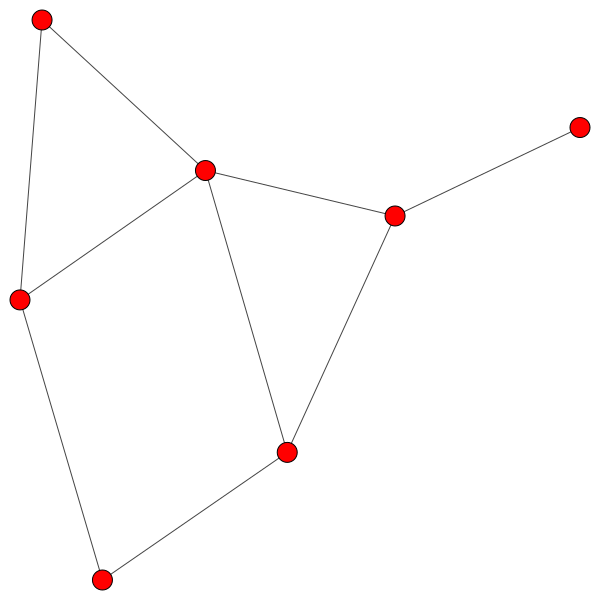

In [67]:
layout = g.layout("kk")
igraph.plot(g, layout = layout)

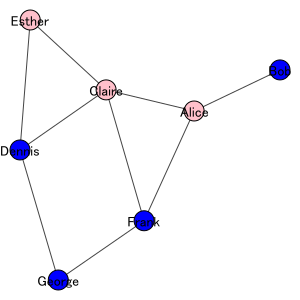

In [68]:
g.vs["label"] = g.vs["name"]
color_dict = {"m": "blue", "f": "pink"}
g.vs["color"] = [color_dict[gender] for gender in g.vs["gender"]]
igraph.plot(g, layout = layout, bbox = (300, 300), margin = 20)

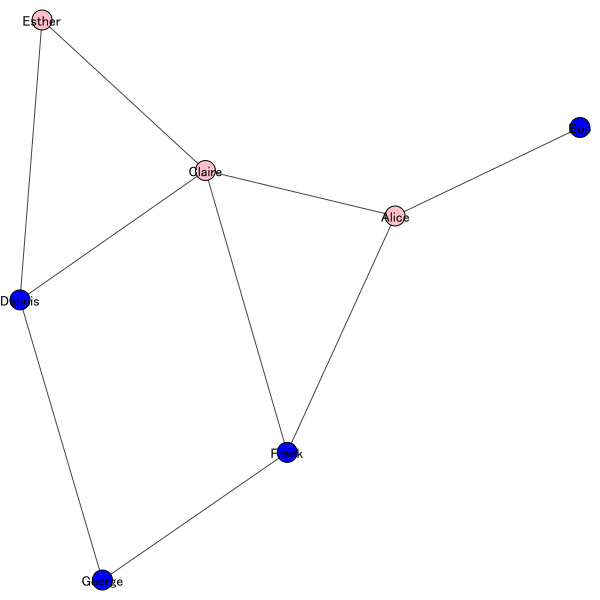

In [69]:
color_dict = {"m": "blue", "f": "pink"}
igraph.plot(g, layout = layout, vertex_color = [color_dict[gender] for gender in g.vs["gender"]])

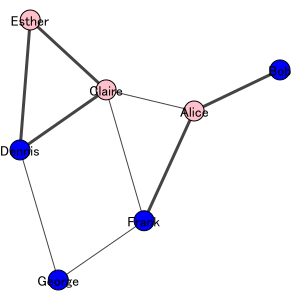

In [70]:
visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_color"] = [color_dict[gender] for gender in g.vs["gender"]]
visual_style["vertex_label"] = g.vs["name"]
visual_style["edge_width"] = [1 + 2 * int(is_formal) for is_formal in g.es["is_formal"]]
visual_style["layout"] = layout
visual_style["bbox"] = (300, 300)
visual_style["margin"] = 20
igraph.plot(g, **visual_style)

## Saving plots

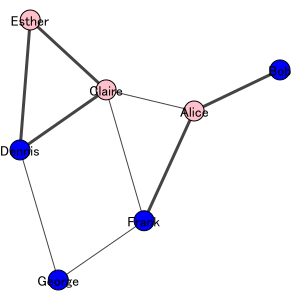

In [71]:
igraph.plot(g, "social_network.pdf", **visual_style)

## igraph and the outside world

In [72]:
karate = igraph.Graph.Read_GraphML("karate.GraphML")
summary(karate)

FileNotFoundError: [Errno 2] No such file or directory: 'karate.GraphML'

In [73]:
karate.write_pajek("karate.net")

NameError: name 'karate' is not defined

In [74]:
karate = load("karate.GraphML")

NameError: name 'load' is not defined

In [75]:
karate.save("karate.net")

NameError: name 'karate' is not defined

In [76]:
karate.save("karate.my_extension", format="gml")

NameError: name 'karate' is not defined